In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data=pd.read_csv('OnlineRetail.csv',encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [92]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth']=data['InvoiceDate'].map(lambda date:100*date.year+date.month)
data['Revenue']=data['UnitPrice']*data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [93]:
revenue_data=data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
revenue_data

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


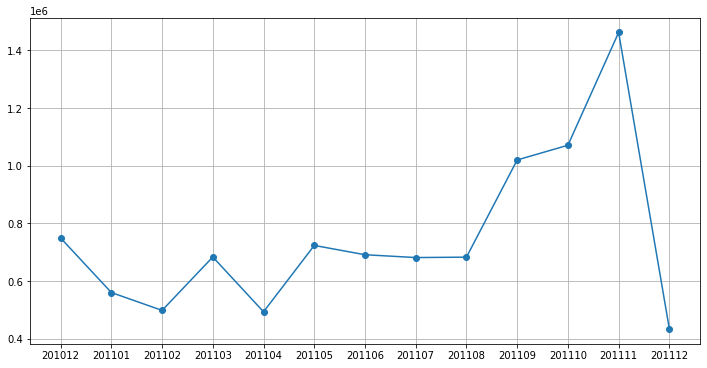

In [94]:
# plt.scatter(revenue_data['InvoiceYearMonth'],revenue_data['Revenue'])
plt.figure(figsize=(12,6))
plt.plot(revenue_data['InvoiceYearMonth'].to_numpy(dtype=str),revenue_data['Revenue'],marker='o')
plt.grid()

In [95]:
revenue_data['MonthlyGrowth']=revenue_data['Revenue'].pct_change()
revenue_data.head(10)

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


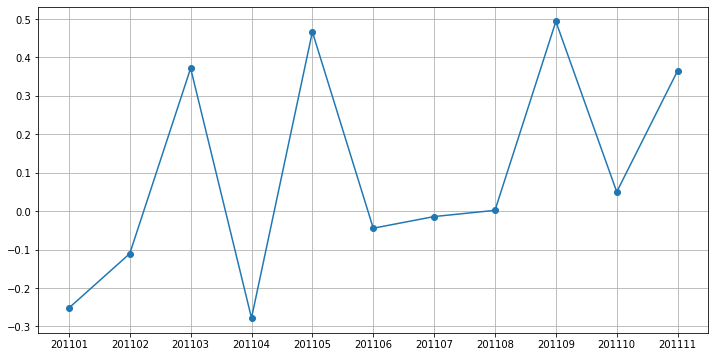

In [96]:
plt.figure(figsize=(12,6))
plt.plot(revenue_data.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),revenue_data.query("InvoiceYearMonth<201112")['MonthlyGrowth'],marker='o')
plt.grid()

In [97]:
data_uk=data.query("Country=='United Kingdom'").reset_index(drop=True)
data_monthly_active=data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
data_monthly_active.head(10)

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


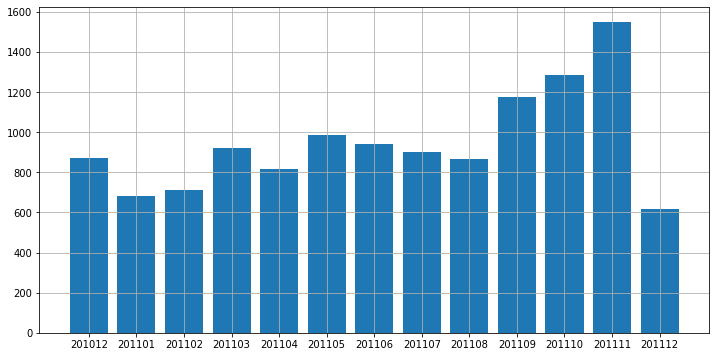

In [98]:
plt.figure(figsize=(12,6))
plt.bar(data_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str),data_monthly_active['CustomerID'])
plt.grid()

In [99]:
data_monthly_sales=data_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
data_monthly_sales.head(10)

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


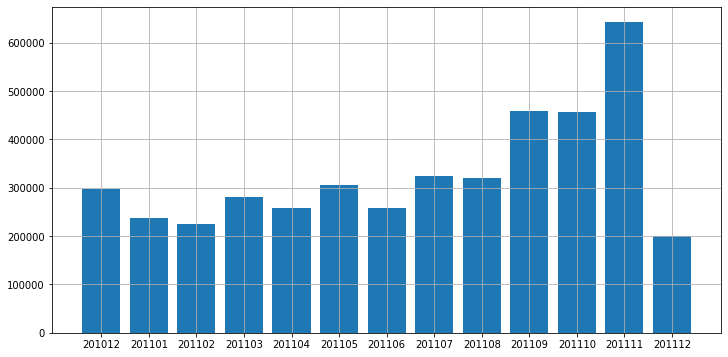

In [100]:
plt.figure(figsize=(12,6))
plt.bar(data_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str),data_monthly_sales['Quantity'])
plt.grid()

In [101]:
data_min_purchase=data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
data_min_purchase.columns=['CustomerID','MinPurchaseDate']
data_min_purchase['MinPurchaseYearMonth']=data_min_purchase['MinPurchaseDate'].map(lambda date:100*date.year+date.month)
data_uk=pd.merge(data_uk,data_min_purchase, on='CustomerID')
data_uk.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012,25.50,2010-12-01 08:26:00,201012
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012


In [102]:
data_uk['Usertype']='new'
data_uk.loc[data_uk['InvoiceYearMonth']>data_uk['MinPurchaseYearMonth'],'Usertype']='Existing'
data_uk.head(500)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,Usertype
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,new
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,new
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,new
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,new
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,571185,23397,FOOT STOOL HOME SWEET HOME,2,2011-10-14 11:15:00,9.95,13047.0,United Kingdom,201110,19.90,2010-12-01 08:34:00,201012,Existing
496,571185,23096,PETIT TRAY CHIC,12,2011-10-14 11:15:00,1.65,13047.0,United Kingdom,201110,19.80,2010-12-01 08:34:00,201012,Existing
497,571185,23487,SWEET HEART CAKE CARRIER,2,2011-10-14 11:15:00,9.95,13047.0,United Kingdom,201110,19.90,2010-12-01 08:34:00,201012,Existing
498,571185,23109,PACK OF SIX LED TEA LIGHTS,12,2011-10-14 11:15:00,2.89,13047.0,United Kingdom,201110,34.68,2010-12-01 08:34:00,201012,Existing


In [120]:
data_user_type_revenue=data_uk.groupby(['InvoiceYearMonth','Usertype'])['Revenue'].sum().reset_index()
data_user_type_revenue=data_user_type_revenue.query("InvoiceYearMonth!=201012 and InvoiceYearMonth!=201112")
data_user_type_revenue.head(10)

,InvoiceYearMonth,Usertype,Revenue
1,201101,Existing,195275.510
2,201101,new,156705.770
3,201102,Existing,220994.630
4,201102,new,127859.000
5,201103,Existing,296350.030
6,201103,new,160567.840
7,201104,Existing,268226.660
8,201104,new,108517.751
9,201105,Existing,434725.860
10,201105,new,90847.490


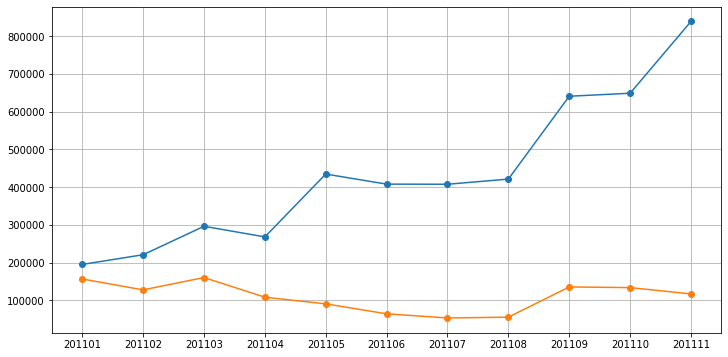

In [121]:
plt.figure(figsize=(12,6))
plt.plot(data_user_type_revenue.query("Usertype=='Existing'")['InvoiceYearMonth'].to_numpy(dtype=str),data_user_type_revenue.query("Usertype=='Existing'")['Revenue'],marker='o')
plt.plot(data_user_type_revenue.query("Usertype=='new'")['InvoiceYearMonth'].to_numpy(dtype=str),data_user_type_revenue.query("Usertype=='new'")['Revenue'],marker='o')
plt.grid()

In [128]:
data_user_ratio=data_uk.query("Usertype=='new'").groupby(["InvoiceYearMonth"])['CustomerID'].nunique()/data_uk.query("Usertype=='Existing'").groupby(["InvoiceYearMonth"])['CustomerID'].nunique()
data_user_ratio=data_user_ratio.reset_index()
data_user_ratio.dropna()
data_user_ratio.head(10)

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


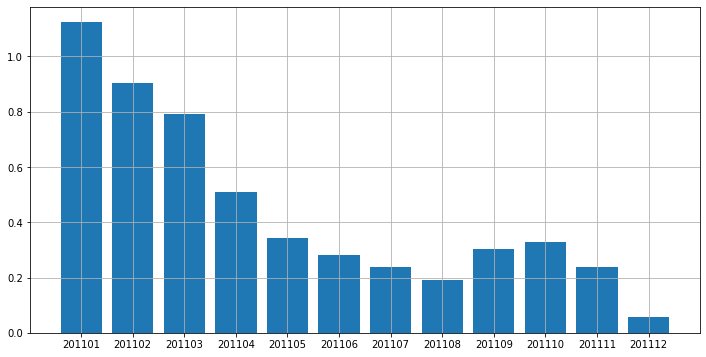

In [129]:
plt.figure(figsize=(12,6))
plt.bar(data_user_ratio['InvoiceYearMonth'].to_numpy(dtype=str),data_user_ratio['CustomerID'])
plt.grid()